<a href="https://colab.research.google.com/github/thiagollg17/AI/blob/main/TP_An%C3%A1lsis_Exploratorio_de_Datos_thiago_laleggia_gerez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis with Python

## Introducción a EDA

El conjunto de datos que vamos a utilizar a lo largo de la sesión se puede encontrar en - https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

#### Importar las librerias requeridas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings

#warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline
#plt.rcParams['figure.figsize'] = [12, 8]

#### Primera mirada al dataset!

Aquí, vamos a utilizar pandas para leer el archivo csv descargado. A continuación, realice una primera mirada al dataset, identificando el número de filas y columnas en el conjunto de datos.



In [18]:
# Importar el dataset

data_df = pd.read_csv("../healthcare-dataset-stroke-data.csv")

In [19]:
# Identificar cantidad de filas y columnas
cantfilas= len(data_df)
cantcolumnas= len (data_df.columns)
print(f"The dataset has {cantfilas} rows")
print(f"The dataset has {cantcolumnas} columns")


The dataset has 5110 rows
The dataset has 12 columns


In [20]:
# Revisar los primeros registroc

data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [21]:
# Ultimas filas
data_df.tail()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [22]:
# Ver el dataset completo

data_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [23]:
# Trasponerlo

data_tra = data_df.T
data_tra

,0,1,2,3,4,5,6,7,8,9,...,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109
id,9046,51676,31112,60182,1665,56669,53882,10434,27419,60491,...,68398,36901,45010,22127,14180,18234,44873,19723,37544,44679
gender,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female,...,Male,Female,Female,Female,Female,Female,Female,Female,Male,Female
age,67.0,61.0,80.0,49.0,79.0,81.0,74.0,69.0,59.0,78.0,...,82.0,45.0,57.0,18.0,13.0,80.0,81.0,35.0,51.0,44.0
hypertension,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
heart_disease,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ever_married,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed,Private,Private,Private,Private,Private,...,Self-employed,Private,Private,Private,children,Private,Self-employed,Self-employed,Private,Govt_job
Residence_type,Urban,Rural,Rural,Urban,Rural,Urban,Rural,Urban,Rural,Urban,...,Rural,Urban,Rural,Urban,Rural,Urban,Urban,Rural,Rural,Urban
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57,...,71.97,97.95,77.93,82.85,103.08,83.75,125.2,82.99,166.29,85.28
bmi,36.6,NaN,32.5,34.4,24.0,29.0,27.4,22.8,NaN,24.2,...,28.3,24.5,21.7,46.9,18.6,NaN,40.0,30.6,25.6,26.2


#### Información de los Atributos

> 1) **id:** unique identifier

> 2) **gender:** "Male", "Female" or "Other"

> 3) **age:** age of the patient

> 4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

> 5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

> 6) **ever_married:** "No" or "Yes"

> 7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

> 8) **Residence_type:** "Rural" or "Urban"

> 9) **avg_glucose_level:** average glucose level in blood

> 10) **bmi:** body mass index

> 11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

> 12) **stroke:** 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### Analizando el dataset

#### Identificar el número de columnas, si hay valores perdidos y también el tipo de características / variables que se encuentran en el conjunto de datos.

In [28]:
cantcolumnas= len (data_df.columns)

print(f"The dataset has {cantcolumnas} columns")

perdido = data_df.isnull().sum()
print(perdido)

tipo = data_df.dtypes
print(tipo)


The dataset has 12 columns
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


#### Filtre el dataset considerando por un lado a los datos tipo objeto y por el otro los numericos

In [36]:
objetos = data_df.select_dtypes(include=['object'])
numerico = data_df.select_dtypes(include=['number'])
print(f"de tipo objeto\n {objetos} \ny de tipo number\n {numerico}")


de tipo objeto
       gender ever_married      work_type Residence_type   smoking_status
0       Male          Yes        Private          Urban  formerly smoked
1     Female          Yes  Self-employed          Rural     never smoked
2       Male          Yes        Private          Rural     never smoked
3     Female          Yes        Private          Urban           smokes
4     Female          Yes  Self-employed          Rural     never smoked
...      ...          ...            ...            ...              ...
5105  Female          Yes        Private          Urban     never smoked
5106  Female          Yes  Self-employed          Urban     never smoked
5107  Female          Yes  Self-employed          Rural     never smoked
5108    Male          Yes        Private          Rural  formerly smoked
5109  Female          Yes       Govt_job          Urban          Unknown

[5110 rows x 5 columns] 
y de tipo number
          id   age  hypertension  heart_disease  avg_glucose_leve

#### ¿Qué persona tiene el IMC máximo del conjunto de datos?

In [38]:
maximoibm = data_df['bmi'].idxmax()
fila = data_df.loc[maximoibm]
print(fila)

id                     56420
gender                  Male
age                     17.0
hypertension               1
heart_disease              0
ever_married              No
work_type            Private
Residence_type         Rural
avg_glucose_level      61.67
bmi                     97.6
smoking_status       Unknown
stroke                     0
Name: 2128, dtype: object


#### Preguntas sobre la mirada inicial

 1. ¿Está correlacionado la variable gender con stroke? ¿Tienen más probabilidades de sufrirlo los hombres o las mujeres?

In [41]:
tablaintermedia = pd.crosstab(data_df['gender'],data_df['stroke'])
proporcion = tablaintermedia.div(tablaintermedia.sum(axis=1),axis=0)
print(proporcion)


stroke         0         1
gender                    
Female  0.952906  0.047094
Male    0.948936  0.051064
Other   1.000000  0.000000


no hay correlacion entre genero y stroke ya que la diferencia es minima. 4.7 para las mujeres y 5.1 para los hombres.

## Ejercicio

1. ¿Cuál es el valor de la décima observación de la característica edad desde la parte superior del conjunto de datos?

In [45]:
decimo = data_df['age'].iloc[9]
print(decimo)

78.0


2. ¿Cuál es el valor de la 7ª observación de la característica bmi desde el fondo del conjunto de datos?

In [48]:
elsiete = data_df['bmi'].iloc[-7]
print(elsiete)

46.9


3. ¿Cuál es el id number y el work_type de la persona con el nivel medio de glucosa más bajo del conjunto de datos?

In [51]:
minglucosa = data_df['avg_glucose_level'].idxmin()
idgluc = data_df.loc[minglucosa,'id']
worktype = data_df.loc[minglucosa,'work_type']

print(idgluc)
print(worktype)

60562
Private


4. Imprime un dataframe filtrado, basado en tres condiciones:

   a) Edad inferior a 30 años
   b) Tipo_residencia es Rural
   c) El sexo es femenino
   
   ¿Cuántas filas hay en el conjunto de datos filtrado?

In [52]:
filtrado = data_df[(data_df['age']<30)&(data_df['Residence_type'] == 'Rural')&(data_df['gender'] == 'Female')]

cantfilas = len(filtrado)

print(filtrado)
print(cantfilas)

         id  gender    age  hypertension  heart_disease ever_married  \
245   49669  Female  14.00             0              0           No   
292   44338  Female  16.00             0              0           No   
294   34974  Female  22.00             0              0           No   
312   68249  Female  27.00             0              0          Yes   
328   29865  Female  21.00             0              0           No   
...     ...     ...    ...           ...            ...          ...   
5027  62416  Female  26.00             0              0          Yes   
5031  67465  Female  20.00             0              0           No   
5032  67426  Female   1.24             0              0           No   
5089  56714  Female   0.72             0              0           No   
5104  14180  Female  13.00             0              0           No   

     work_type Residence_type  avg_glucose_level   bmi smoking_status  stroke  
245   children          Rural              57.93  30.9 

## Analisis Univariado de datos

Utilice una función que nos ayude a imprimir algunos estadísticos resumidos básicos como el recuento, la media, la desviación típica, el valor máximo, el valor mínimo y los percentiles 25, 50 y 75 de cada una de las variables.

In [53]:

data_df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Variable Target - Stroke

Analice la distribución de la variable target y grafique en un grafico de sectores (torta)

In [54]:
# Obser si el dataset esta desbalanceado, contando las ocurrencias de cada valor de la variable

cantstrokes = data_df['stroke'].value_counts()
print (cantstrokes)


stroke
0    4861
1     249
Name: count, dtype: int64


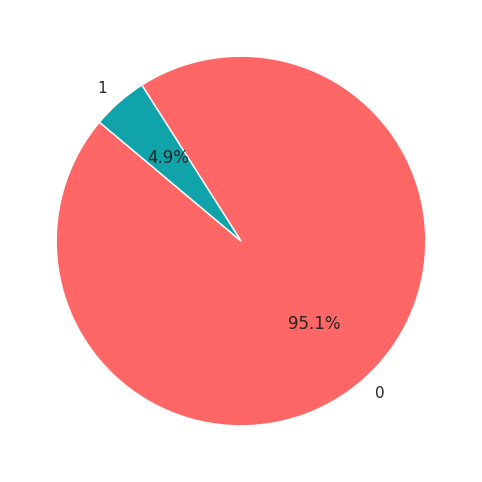

In [60]:
# stroke - pie chart

plt.figure(figsize=(8, 6))
plt.pie(cantstrokes, labels=cantstrokes.index, autopct='%1.1f%%', colors=['#ff6666','#11a3aa'], startangle=140)

plt.show()



#### Variables numéricas Continuas - age, avg_glucose_level, bmi

**Histograma**

Un histograma muestra datos numéricos agrupándolos en "intervalos" de igual anchura. Cada intervalo se representa como una barra cuya altura corresponde al número de puntos de datos que contiene.

Text(0, 0.5, 'arequency')

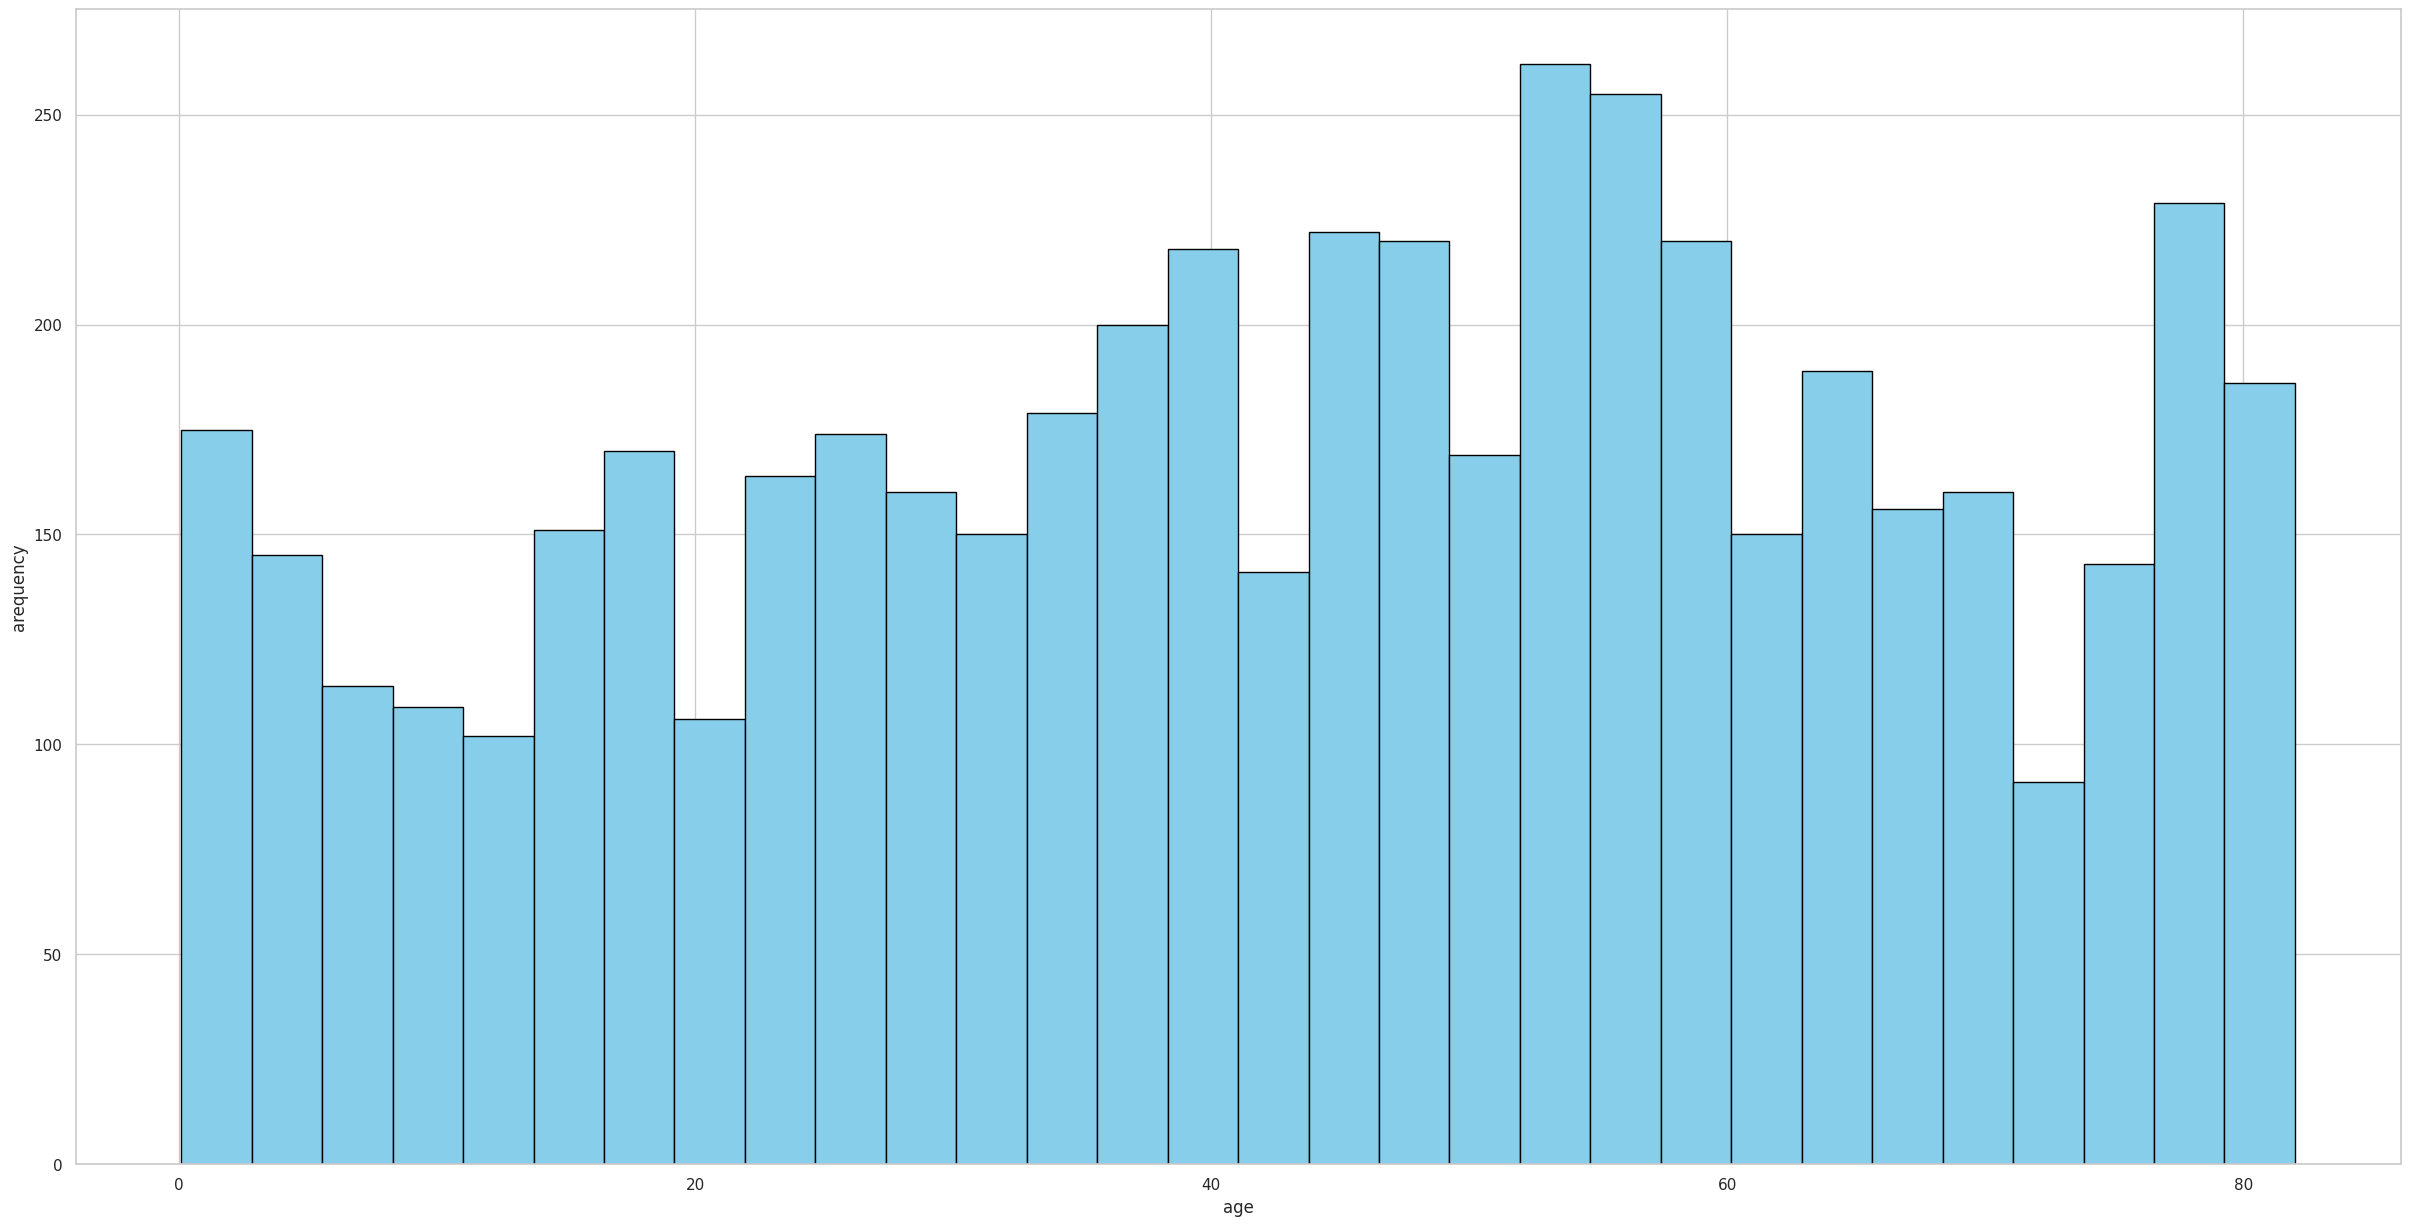

In [71]:
# Gráfico simple - age


plt.figure(figsize=(30, 15))

plt.hist(data_df['age'], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('age')
plt.ylabel('arequency')

Text(0, 0.5, 'arequency')

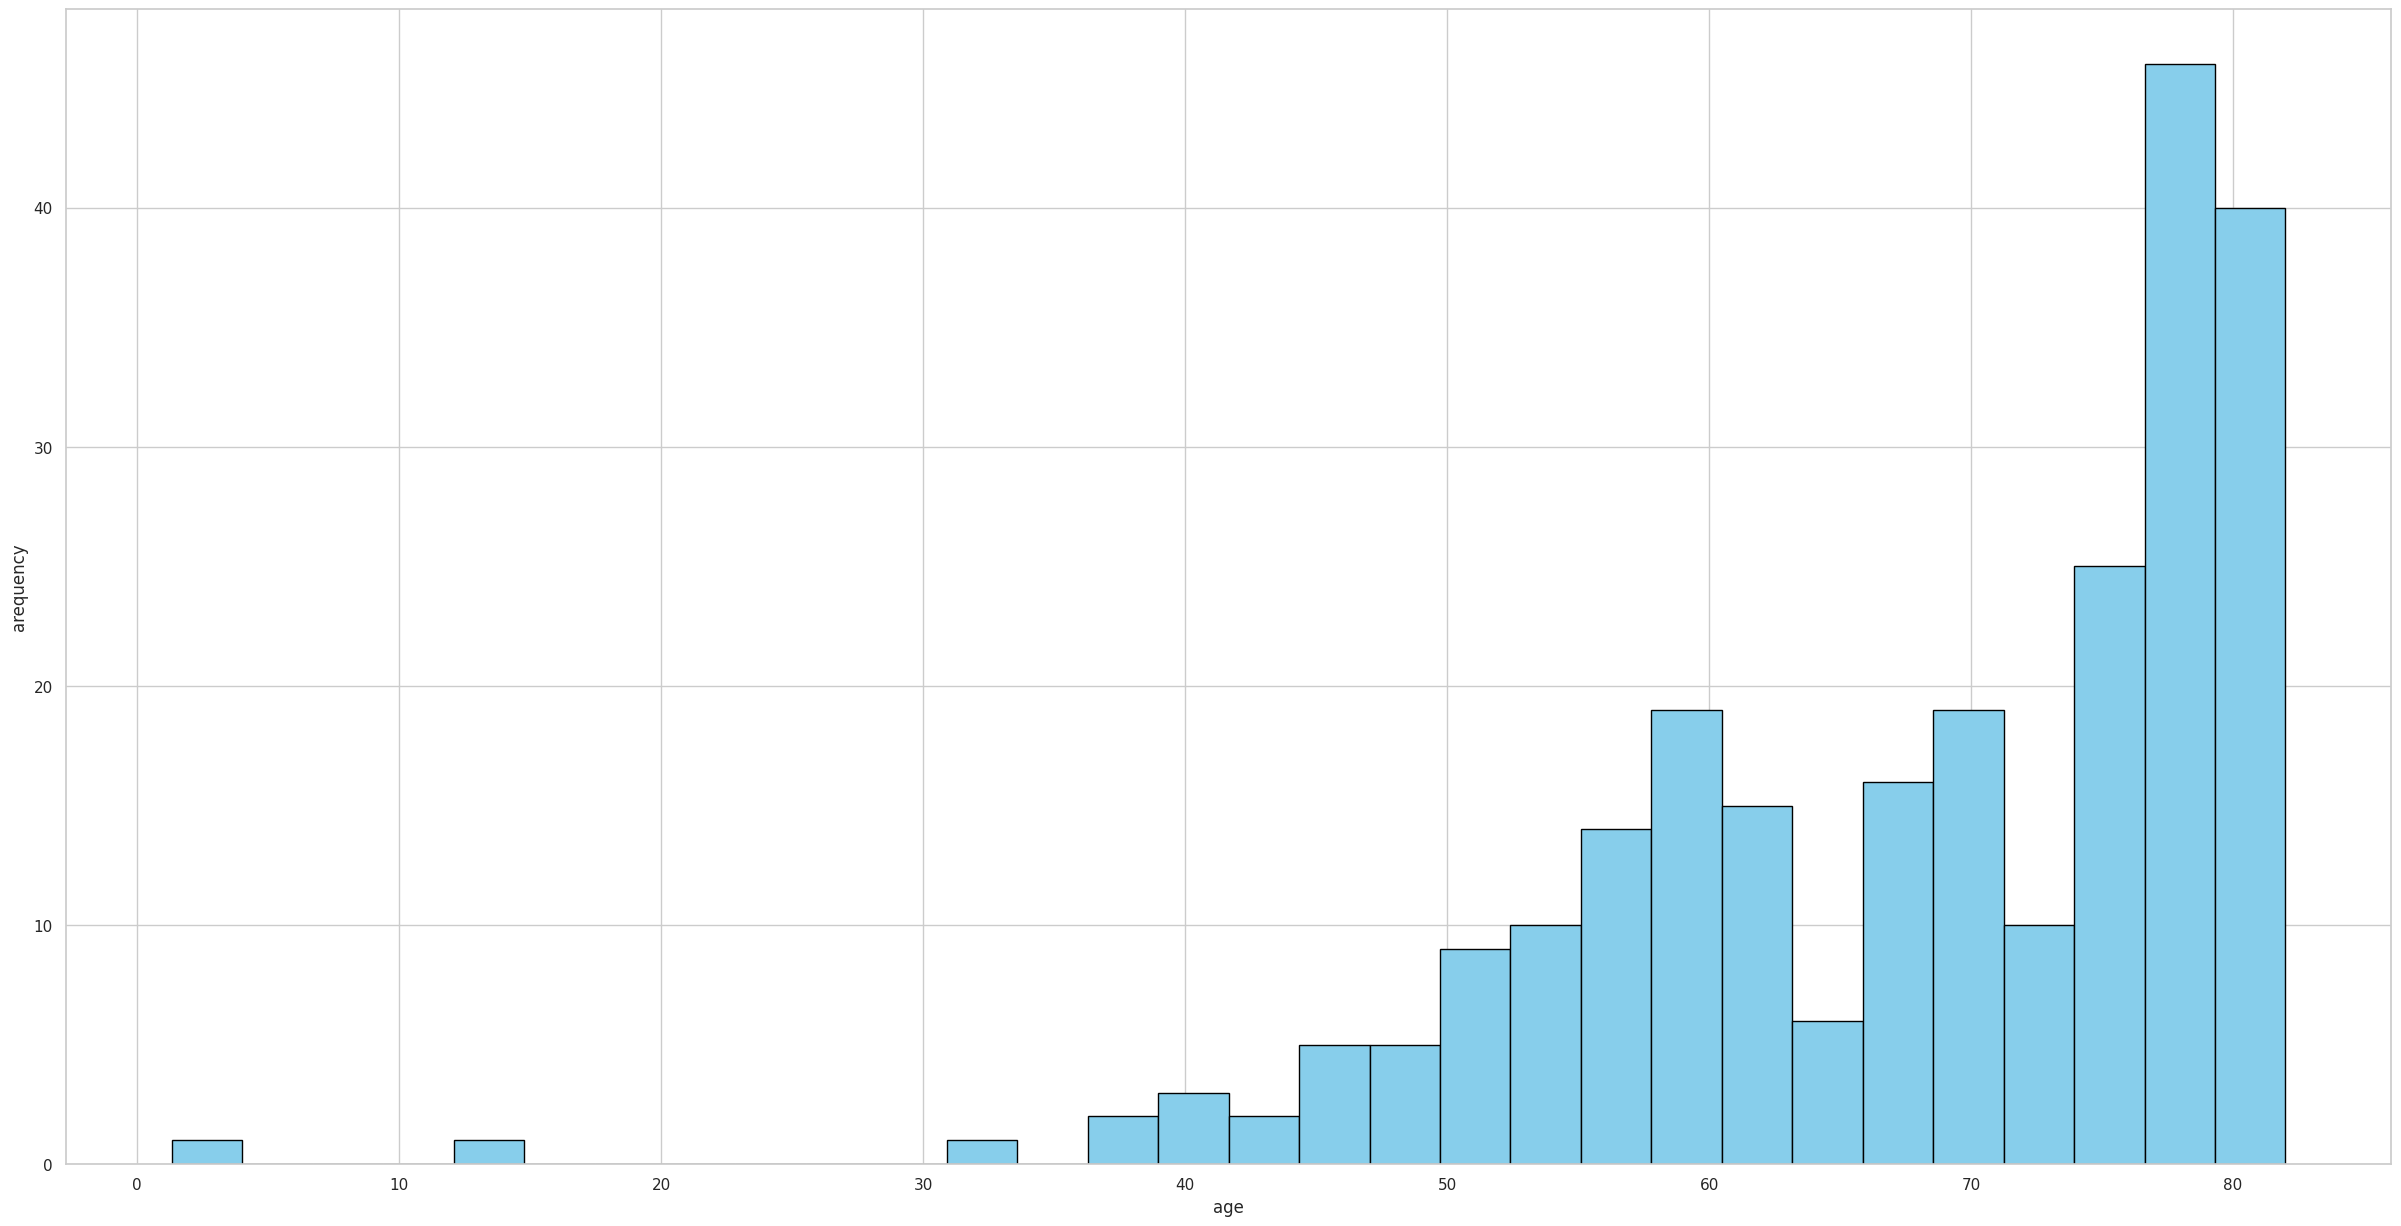

In [72]:
# Histograma de "age" en gente con "stroke"

dstro = data_df[data_df['stroke']==1]

plt.figure(figsize=(30, 15))

plt.hist(dstro['age'], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('age')
plt.ylabel('arequency')

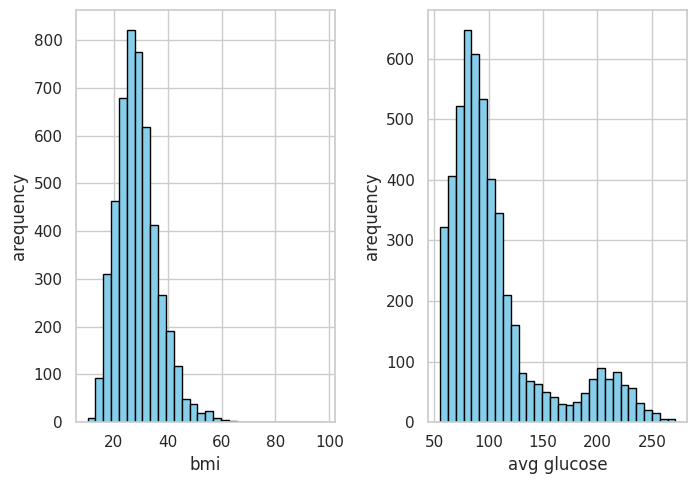

In [80]:
# subplots - bmi, avg_glucose_level

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 2)
plt.hist(data_df['bmi'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('bmi')
plt.ylabel('arequency')

plt.subplot(1, 3, 3)
plt.hist(data_df['avg_glucose_level'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('avg glucose')
plt.ylabel('arequency')

plt.tight_layout()
plt.show()

#### Boxplots and Outliers

Un diagrama de caja es una forma estandarizada de mostrar la distribución de los datos basada en un resumen de cinco números ("mínimo", primer cuartil (Q1), mediana, tercer cuartil (Q3) y "máximo"). Puede informarle sobre sus valores atípicos y cuáles son. También puede indicarle si sus datos son simétricos, con qué precisión están agrupados y si están sesgados y de qué forma.

Represente en Diagramas de Cajas / Boxplot las variables númericas del punto anterior e interprete los resultados

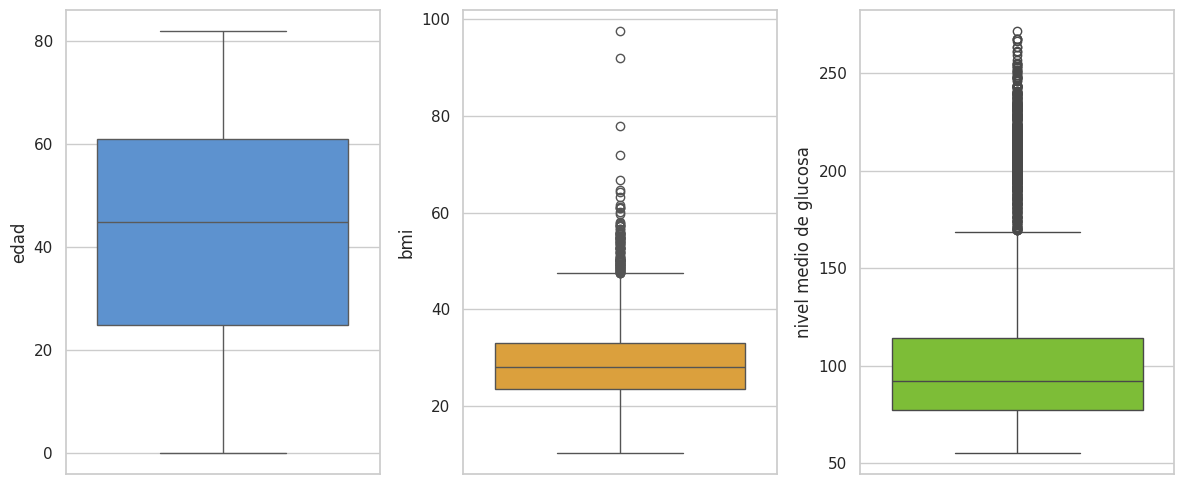

In [83]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 3, 1)
sns.boxplot(y=data_df['age'], color='#4A90E2')
plt.ylabel('edad')


plt.subplot(1, 3, 2)
sns.boxplot(y=data_df['bmi'], color='#F5A623')
plt.ylabel('bmi')


plt.subplot(1, 3, 3)
sns.boxplot(y=data_df['avg_glucose_level'], color='#7ED321')
plt.ylabel('nivel medio de glucosa')


plt.tight_layout()
plt.show()

#### ¿Debemos eliminar o mantener los valores atípicos?

si son valores reales (no de errores de medicion) se debe mantener ya que pueden aportarnos mas informacion (por ej enfermedades raras o variaciones propias del topico). en cambio si uno tiene la certeza de que son errores y afectan al analisis se pueden eliminar para evitar distorsion de resultados.

#### Variables Categoricas - gender, ever_married, work_type, residence_type, smoking_status

In [82]:
# Utilice la funcion describe para analizar las columnas no numericas

data_df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


#### Diagrama de Barras

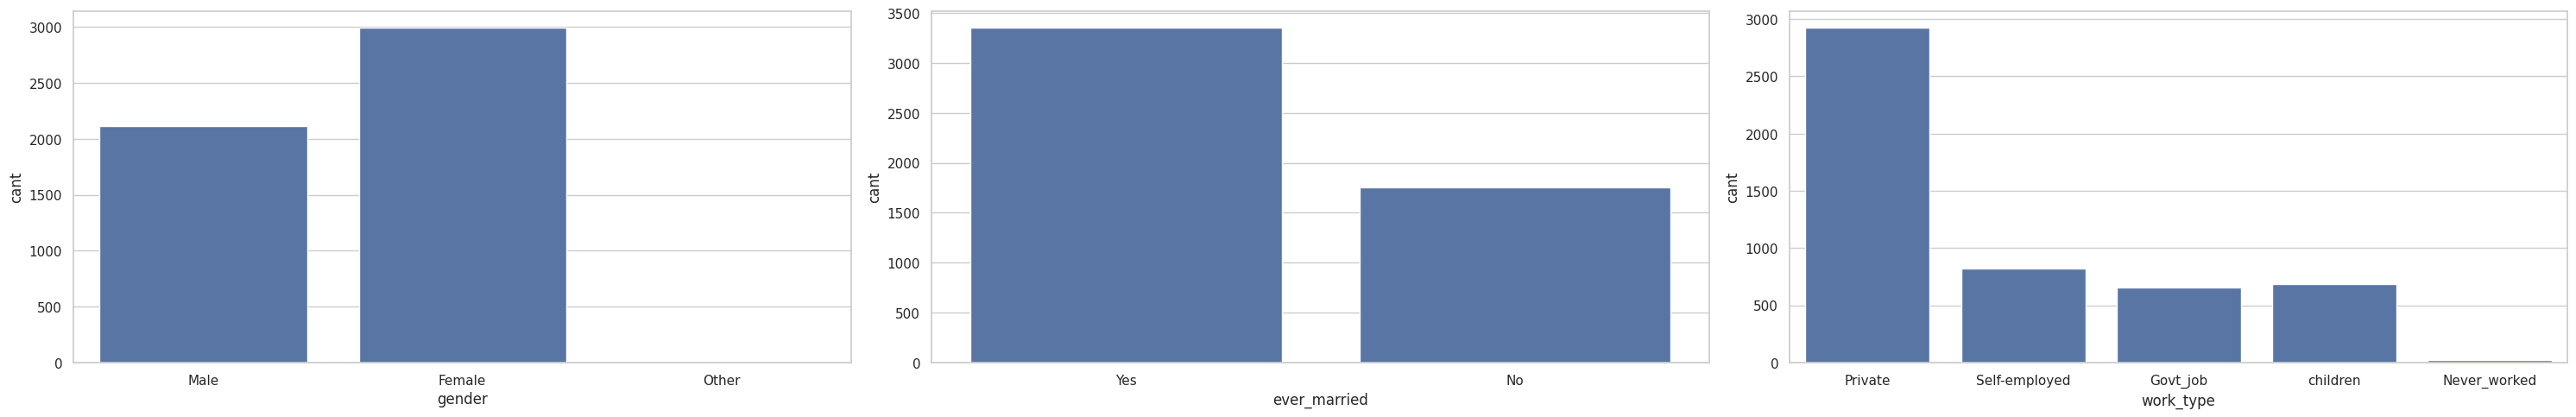

In [87]:
#  Diagrama de Barras para gender, ever_married y work_type
plt.figure(figsize=(30, 5))


plt.subplot(1, 3, 1)
sns.countplot(data=data_df, x='gender')
plt.ylabel('cant')


plt.subplot(1, 3, 2)
sns.countplot(data=data_df, x='ever_married')
plt.ylabel('cant')


plt.subplot(1, 3, 3)
sns.countplot(data=data_df, x='work_type')
plt.ylabel('cant')

plt.tight_layout()
plt.show()

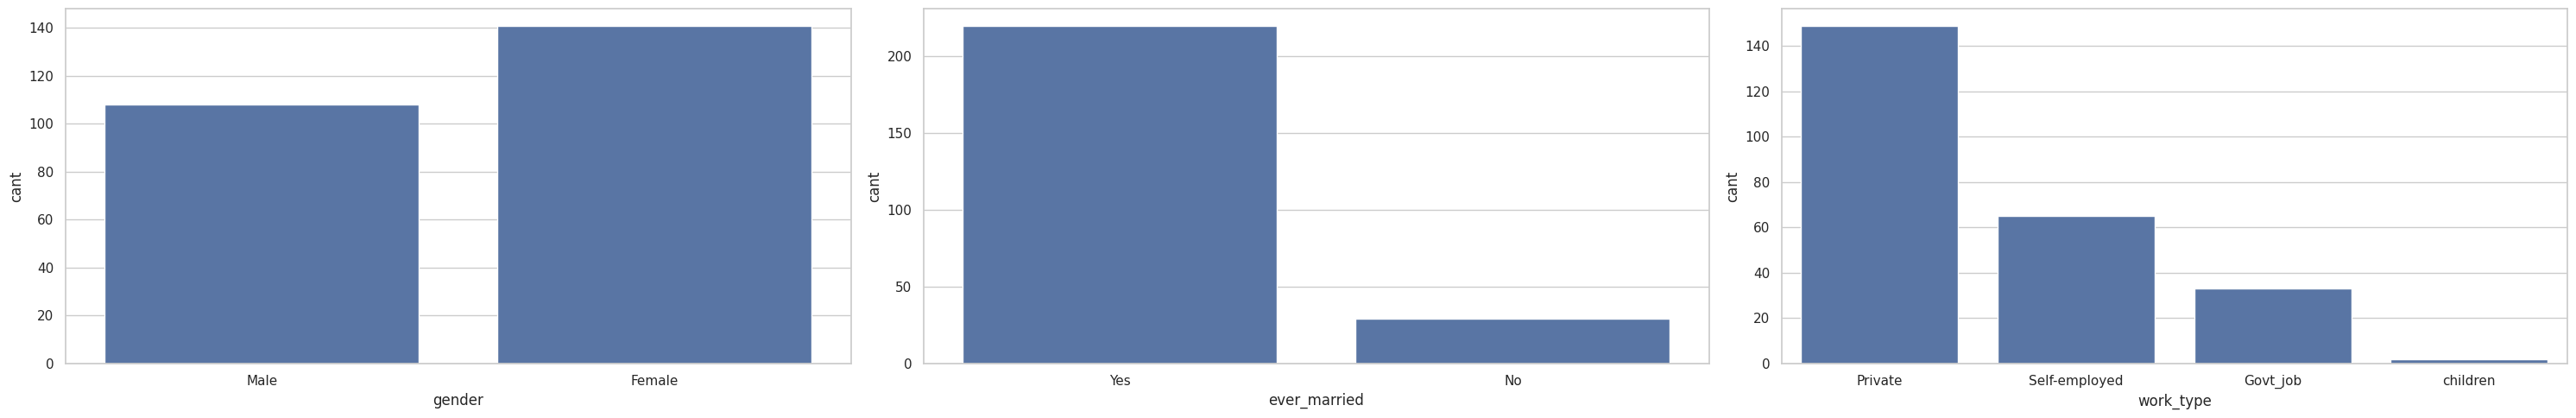

In [89]:
# Lo mismo que arriba para las personas que han sufrido la enfermedad
stdata = data_df[data_df['stroke']==1]

plt.figure(figsize=(30, 5))


plt.subplot(1, 3, 1)
sns.countplot(data=stdata, x='gender')
plt.ylabel('cant')


plt.subplot(1, 3, 2)
sns.countplot(data=stdata, x='ever_married')
plt.ylabel('cant')


plt.subplot(1, 3, 3)
sns.countplot(data=stdata, x='work_type')
plt.ylabel('cant')

plt.tight_layout()
plt.show()

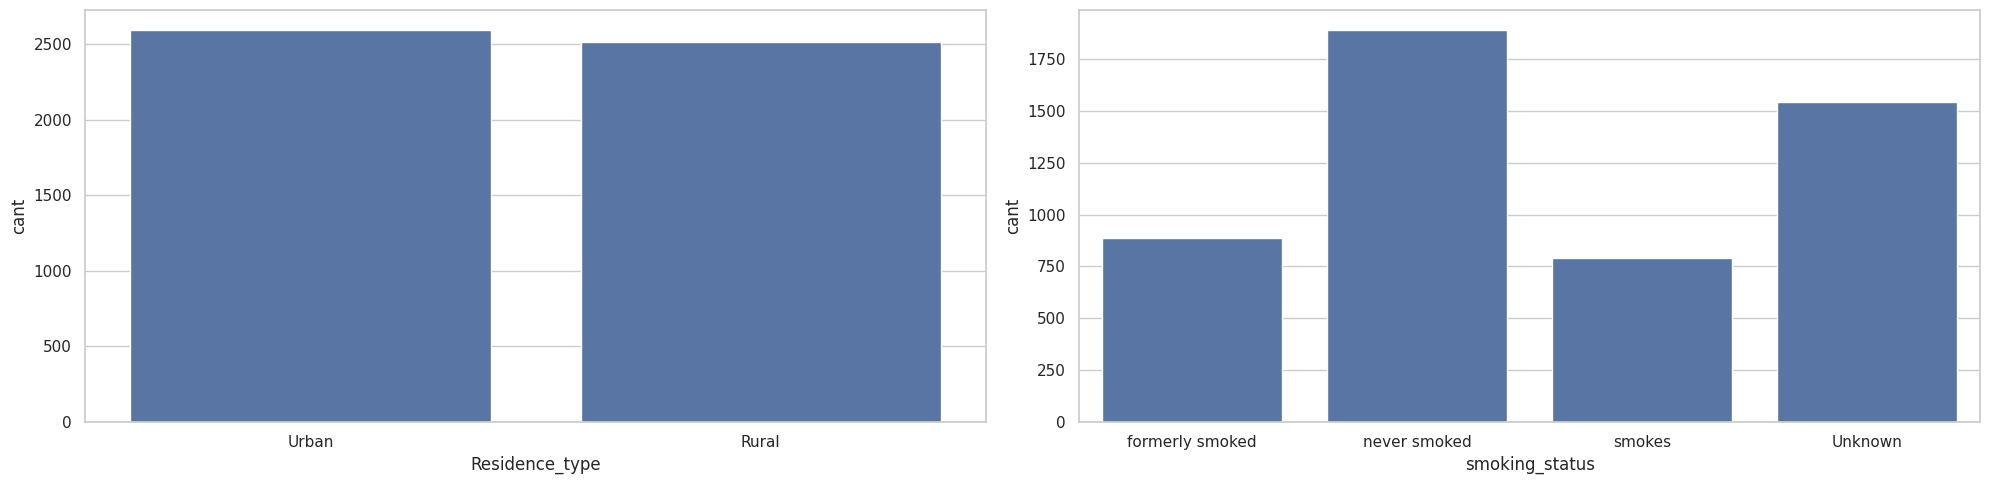

In [91]:
#  Diagrama de Barras para residence_type y smoking_status

plt.figure(figsize=(30, 5))


plt.subplot(1, 3, 1)
sns.countplot(data=data_df, x='Residence_type')
plt.ylabel('cant')


plt.subplot(1, 3, 2)
sns.countplot(data=data_df, x='smoking_status')
plt.ylabel('cant')




plt.tight_layout()
plt.show()

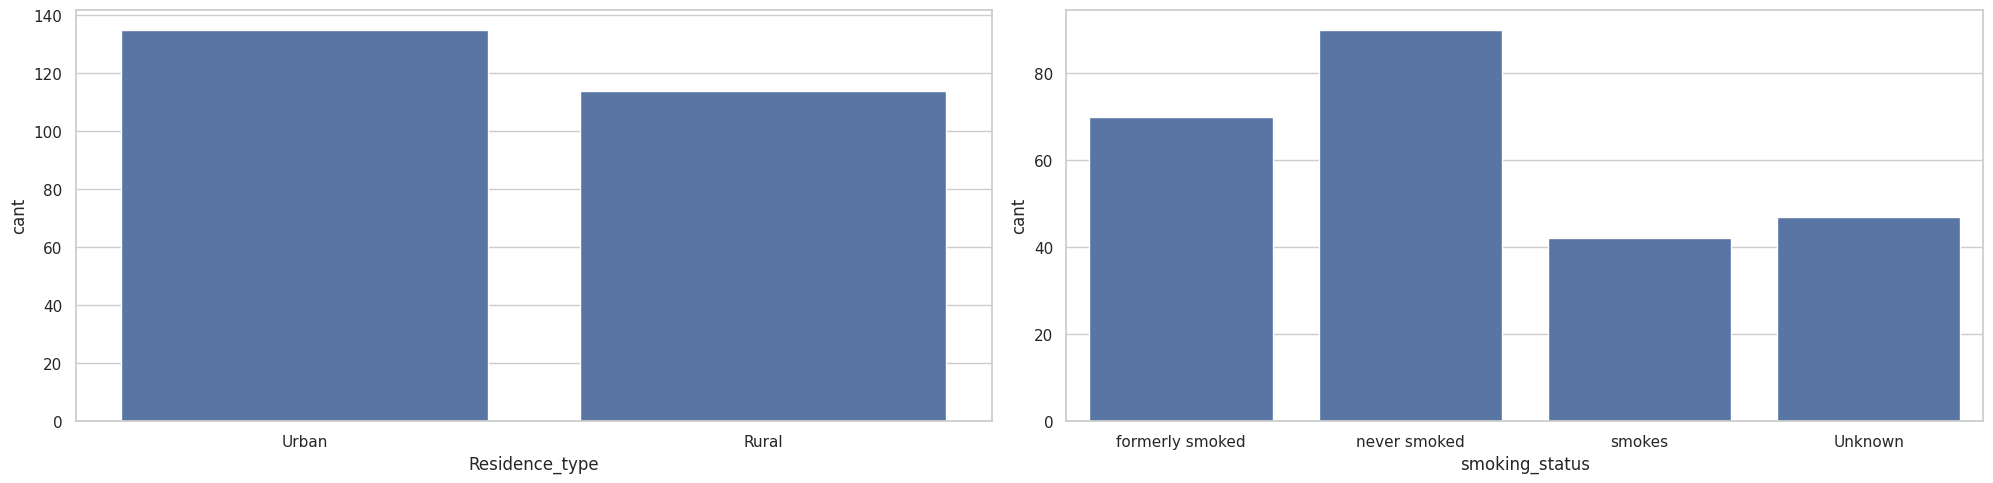

In [92]:
# Lo mismo que arriba pero para personas que sufrieron la enfermedad

stdata = data_df[data_df['stroke']==1]

plt.figure(figsize=(30, 5))


plt.subplot(1, 3, 1)
sns.countplot(data=stdata, x='Residence_type')
plt.ylabel('cant')


plt.subplot(1, 3, 2)
sns.countplot(data=stdata, x='smoking_status')
plt.ylabel('cant')




plt.tight_layout()
plt.show()

## Analisis Bivariado

#### ¿Las personas mayores tienden a tener más accidentes cerebrovasculares? (Ayudese con un Diagrama de Cajas comparativo)

si ya que se puede ve que la mediana se encuentra cerca de los 70 años puediendo asi asumir que a mayor edad mas acv

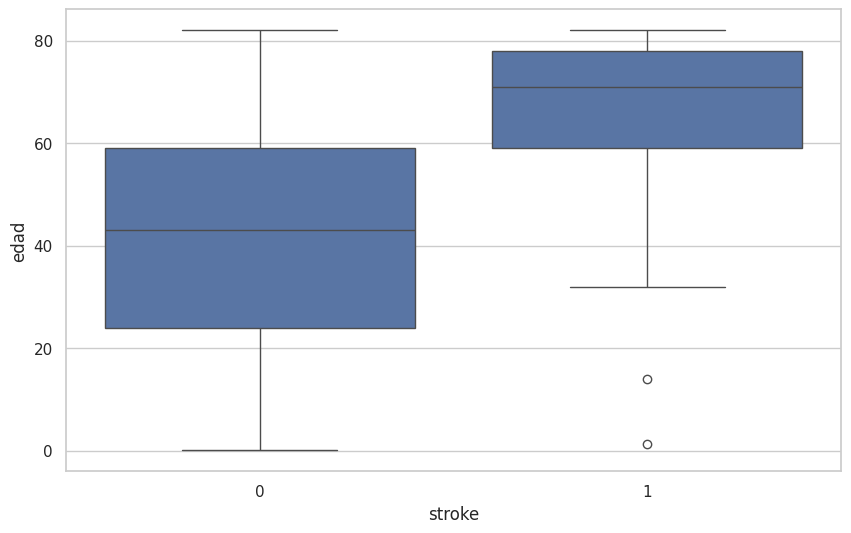

In [94]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='age', data=data_df)

plt.xlabel('stroke')
plt.ylabel('edad')


plt.show()

#### Existe una conexión entre el tipo de trabajo que realiza y su índice de masa corporal? (Utilice violinplot)

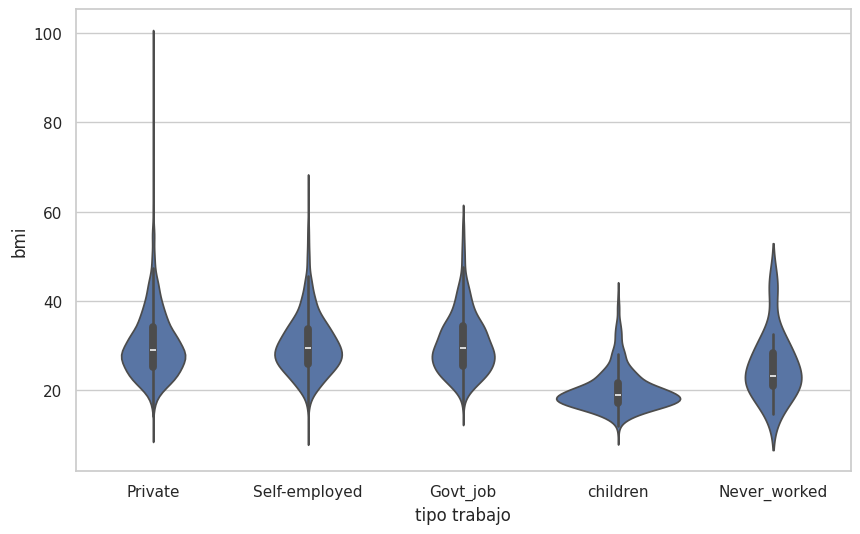

In [96]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='work_type', y='bmi', data=data_df)


plt.xlabel('tipo trabajo')
plt.ylabel('bmi')


plt.show()

no hay conexion fuerte ente bmi y tipo trabajo. tenemos distribuciones similares. solo difiere la densidad en children


no. no hay conexion alguna

#### ¿Las personas mayores tienen un nivel de glucosa promedio más alto? (Ayudese utilizando un scatterplot)

asi es. si vemos a la derecha arriba vemos que hay mas puntos, es decir que a mas edad la glucosa se eleva

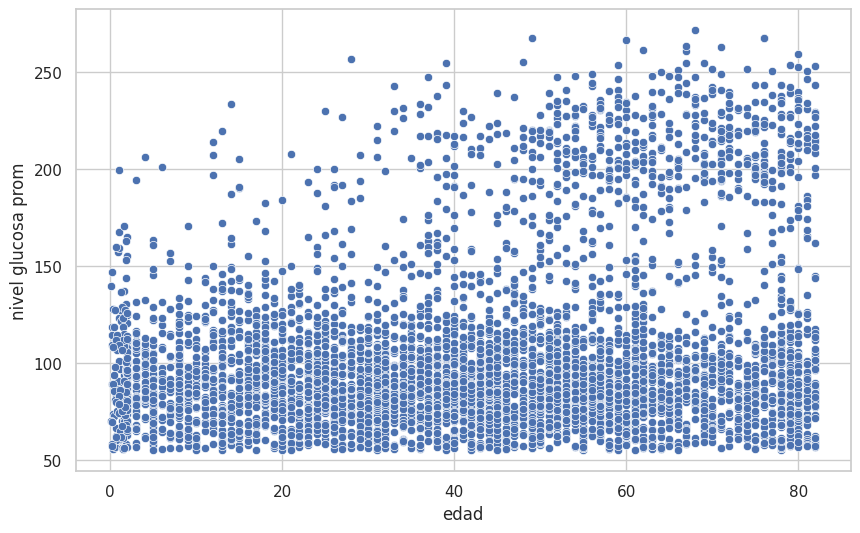

In [99]:

plt.figure(figsize=(10, 6))


sns.scatterplot(x='age', y='avg_glucose_level', data=data_df)
plt.xlabel('edad')
plt.ylabel('nivel glucosa prom')

plt.show()

#### Tabaquismo frente a accidente cerebrovascular y tipo de trabajo frente a hipertensión (realice la comparacion utilizando countplot)

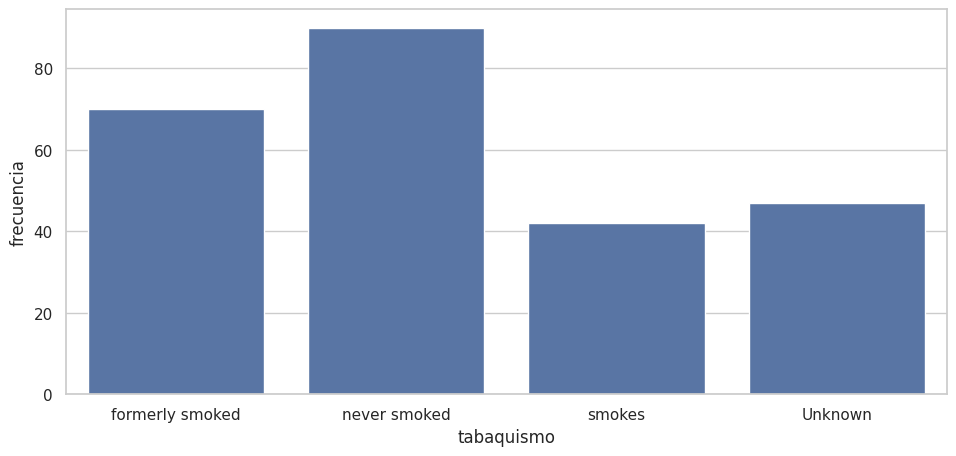

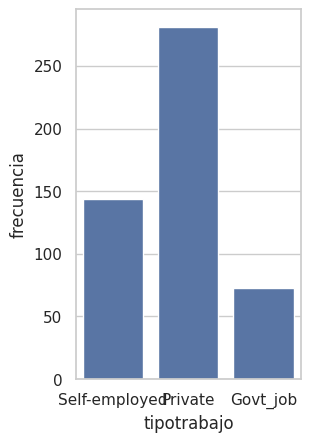

In [108]:


plt.figure(figsize=(25, 5))


plt.subplot(1, 2, 1)
sns.countplot(x='smoking_status', data=data_df[data_df['stroke']==1] )

plt.xlabel('tabaquismo')
plt.ylabel('frecuencia')
plt.show()



plt.subplot(1, 2, 2)
sns.countplot(x='work_type', data=data_df[data_df['hypertension']==1] )

plt.xlabel('tipotrabajo')
plt.ylabel('frecuencia')
plt.show()


## Ejercicio

   
Crea una figura de 3 subplots para responder las siguientes preguntas:
   
   a) ¿Cuál es el porcentaje de personas con hipertensión en el conjunto de datos?
   
   b) En los diferentes valores dentro de la característica ""smoking_status"", ¿los hombres superan en número a las mujeres en alguno de ellos?
   
   c) ¿Qué me puede decir sobre la relación entre el tipo de trabajo y la edad?
   
   Todas las figuras deben contener títulos.

a)90.3 con hipertension
b)no, las mujeres superan a los hombres en todos los estados de smoking status
c)se puede ver que la gente joven nunca trabajo a diferencia de los mas adultos. tambien se ve que luego de los 60 años las personas trabajan para ellas mismas

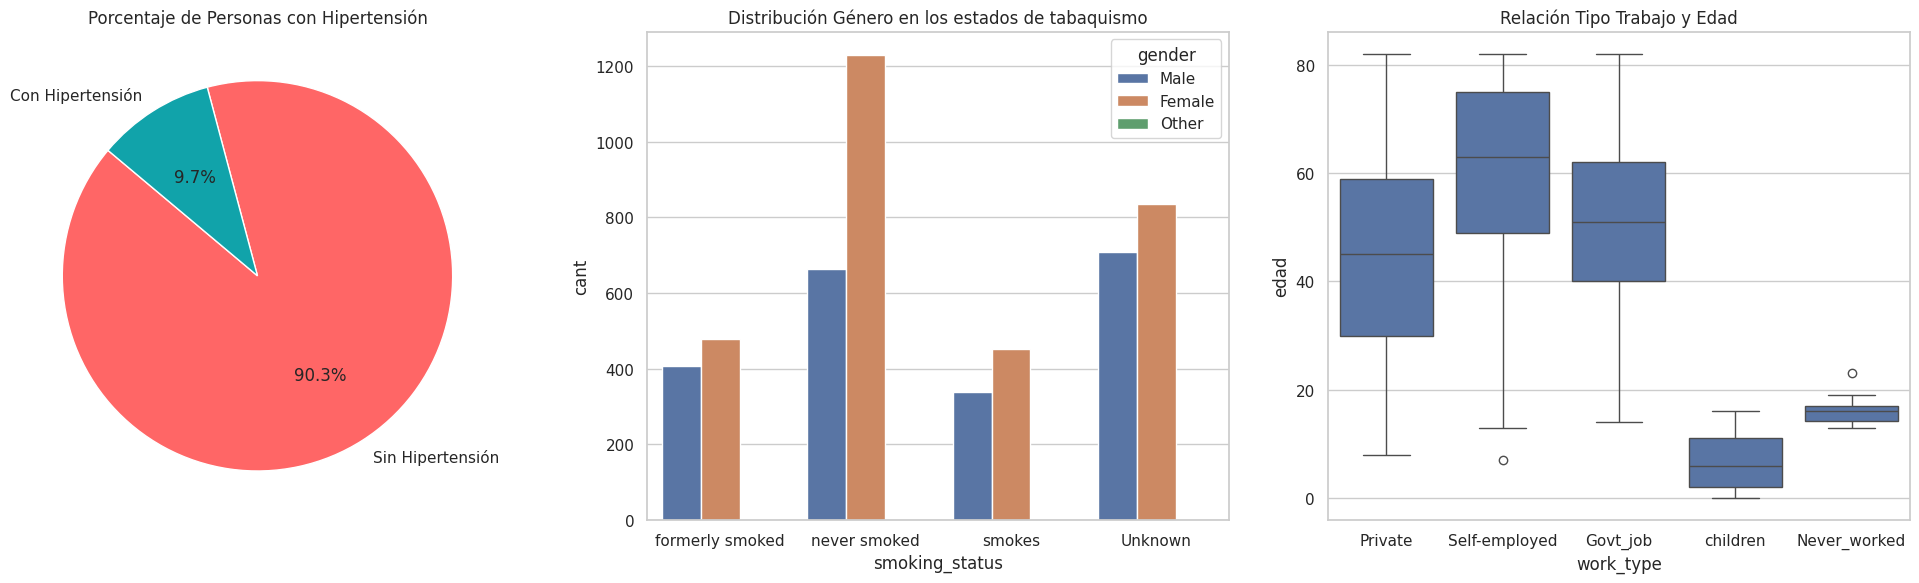

In [127]:



plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
hyperc = data_df['hypertension'].value_counts()
plt.pie(hyperc, labels=['Sin Hipertensión', 'Con Hipertensión'], autopct='%1.1f%%', colors=['#ff6666','#11a3aa'], startangle=140)
plt.title('Porcentaje de Personas con Hipertensión')




plt.subplot(1, 3, 2)
sns.countplot(data=data_df,hue='gender', x='smoking_status')
plt.title('Distribución Género en los estados de tabaquismo')
plt.ylabel('cant')


plt.subplot(1, 3, 3)
sns.boxplot(data=data_df, x='work_type', y='age')
plt.title('Relación Tipo Trabajo y Edad')
plt.ylabel('edad')



plt.tight_layout()
plt.show()

## Missing Data

Analice las variabels con valores nulos y calcule los porcentajes de dichos valores por variable

Imprima los registros del data set con valores faltantes

Crear un flag para indicar los valores faltantes para las variables con valores nulos

Rellene los valores faltantes con la media

## Análisis de Correlación


Analice la correlación entre las variables, presente un heatmap y extraiga conclusiones